# Pemodelan Regresi Pada Harga Saham Tesla

#### Persiapan Data

In [12]:
# import package yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [276]:
# baca dataset saham tesla

df = pd.read_csv('tesla-stock.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [13]:
# set kolom date menjadi index

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [14]:
# melihat informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1692 entries, 6/29/2010 to 3/17/2017
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5+ KB


In [8]:
# melihat statistik deskriptif pada data

df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [15]:
# cek nilai kosong

df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

#### Eksplorasi Data

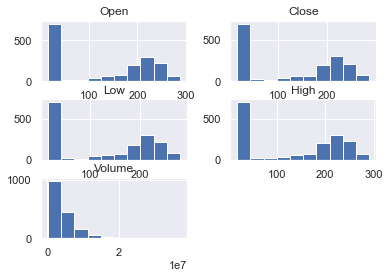

In [98]:
viz = df[['Open','Close','Low','High','Volume']]
viz.hist()
plt.show()

/Users/nugie/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

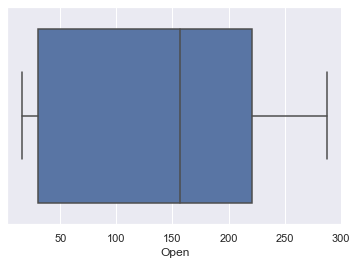

In [18]:
sns.boxplot(df['Open'])

/Users/nugie/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

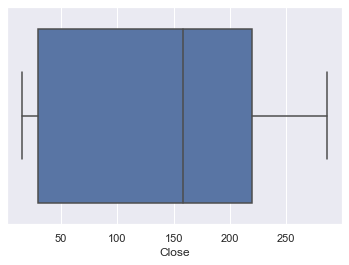

In [19]:
sns.boxplot(df['Close'])

/Users/nugie/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

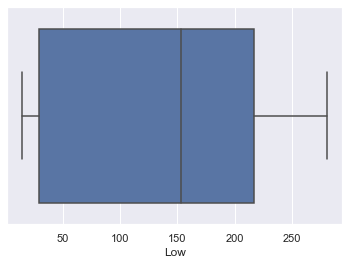

In [20]:
sns.boxplot(df['Low'])

<AxesSubplot:xlabel='High'>

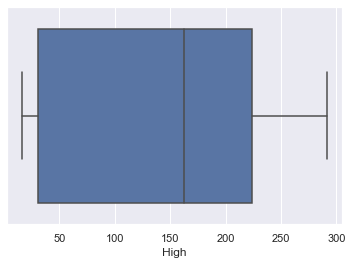

In [22]:
sns.boxplot(df['High'])

/Users/nugie/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

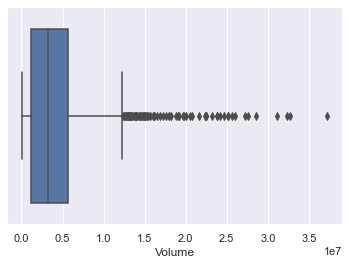

In [24]:
sns.boxplot(df['Volume'])

#### Menghilangkan outliers

In [178]:
r = df['Volume'].quantile(0.90)
df_1 = df[df['Volume'] < r]

In [179]:
r = df_1['Open'].quantile(0.90)
df_2 = df_1[df_1['Open'] < r]

In [180]:
r = df_2['Close'].quantile(0.90)
df_3 = df_2[df_2['Close'] < r]

In [181]:
r = df_3['High'].quantile(0.90)
df_4 = df_3[df_3['High'] < r]

In [182]:
r = df_4['Low'].quantile(0.90)
df_5 = df_4[df_4['Low'] < r]

In [184]:
df_no_outliers = df_5.reset_index(drop=True)

In [248]:
# cek dataframe setelah menghilangkan outliers

df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       997 non-null    float64
 1   High       997 non-null    float64
 2   Low        997 non-null    float64
 3   Close      997 non-null    float64
 4   Volume     997 non-null    int64  
 5   Adj Close  997 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 46.9 KB


#### Pre-processing

In [249]:
from sklearn.preprocessing import StandardScaler

In [250]:
# melakukan data scaling

scaled = StandardScaler()
scaled.fit(df_no_outliers)
scaled_data = scaled.transform(df_no_outliers)

In [251]:
scaled_data = pd.DataFrame(scaled_data,columns=df_no_outliers.columns.values)
scaled_data

,Open,High,Low,Close,Volume,Adj Close
0,-0.674077,-0.668862,-0.734202,-0.716968,2.473789,-0.716968
1,-0.702666,-0.708517,-0.756901,-0.756383,1.132784,-0.756383
2,-0.745551,-0.752110,-0.798806,-0.800512,1.884992,-0.800512
3,-0.797012,-0.799500,-0.811174,-0.804939,1.908859,-0.804939
4,-0.800729,-0.786985,-0.802589,-0.781232,2.252799,-0.781232
...,...,...,...,...,...,...
992,1.809502,1.821282,1.833795,1.806923,0.702085,1.806923
993,1.804785,1.789501,1.842962,1.791071,0.296474,1.791071
994,1.800068,1.815516,1.846018,1.861191,0.547907,1.861191
995,1.863108,1.841672,1.878610,1.864619,0.413414,1.864619


In [252]:
from sklearn.model_selection import train_test_split

In [253]:
x = scaled_data[['Open','High','Low','Volume']]
y = scaled_data['Close']

In [254]:
# Split data 80% training - 20% test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [255]:
# melihat jumlah data training

x_train.shape , y_train.shape

((797, 4), (797,))

In [256]:
# melihat jumlah data test

x_test.shape , y_test.shape

((200, 4), (200,))

#### Pemodelan

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [259]:
reg.coef_

array([-0.54899121,  0.8856008 ,  0.66411096, -0.00156425])

In [260]:
reg.intercept_

-7.729053237327636e-05

In [261]:
train_predict = reg.predict(x_train)

In [262]:
train_predict

array([ 1.80385744, -0.66213035,  1.92483289, -0.69663688,  0.87567042,
       -0.71476436,  1.75520294, -0.68361984,  1.81484127, -0.55767189,
       -0.60478884, -0.73011484, -0.63505526,  1.92401412, -0.60511007,
       -0.69072482, -0.62320221, -0.43434579, -0.49052189, -0.49111618,
       -0.61699008, -0.55124251, -0.57574561, -0.60772654, -0.63485621,
        1.51222546, -0.66105957, -0.57165477, -0.63523656, -0.6063504 ,
       -0.73075138, -0.73592378, -0.3281987 , -0.49751786, -0.63937066,
       -0.55479783, -0.59105691, -0.54496585, -0.67521135, -0.71365396,
        1.46719579, -0.60317707,  1.91197488,  1.77932864, -0.73667343,
       -0.71327318, -0.73389755, -0.65640895,  1.43192184, -0.548147  ,
       -0.54885424, -0.61042238, -0.64683971,  1.80016204, -0.59788842,
       -0.58346248, -0.62313435, -0.59050533, -0.44924199, -0.61547819,
        1.84591499,  1.66950963, -0.63488761, -0.65770539, -0.55802104,
       -0.70783026,  1.10453937, -0.614204  , -0.69340256, -0.63

In [263]:
predict_train_table = pd.DataFrame({
    'Actual':y_train,'prediction': train_predict})

In [264]:
predict_train_table=predict_train_table.reset_index(drop=True)
predict_train_table.head(20)

,Actual,prediction
0,1.793928,1.803857
1,-0.659129,-0.662130
2,1.937881,1.924833
3,-0.693118,-0.696637
4,0.887081,0.875670
5,-0.718253,-0.714764
6,1.807066,1.755203
7,-0.705114,-0.683620
8,1.820348,1.814841
9,-0.556163,-0.557672


<AxesSubplot:>

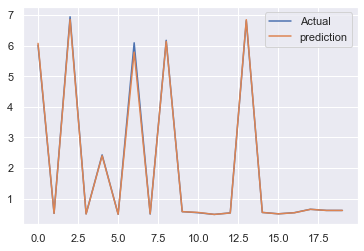

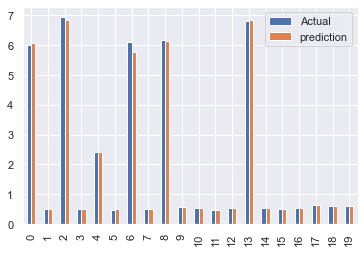

In [265]:
show_graph_train = np.exp(predict_train_table.head(20))
show_graph_train.plot(kind='line')
show_graph_train2 = np.exp(predict_train_table.head(20))
show_graph_train2.plot(kind='bar')

In [266]:
predict_test = reg.predict(x_test)

In [267]:
predict_test_table = pd.DataFrame({'Actual': y_test,'Prediction': predict_test
})

In [268]:
predict_test_table =predict_test_table.reset_index(drop=True)
predict_test_table.head(25)

,Actual,Prediction
0,-0.531314,-0.533178
1,-0.412210,-0.416974
2,-0.638993,-0.640059
3,-0.661414,-0.651052
4,0.464361,0.476671
5,-0.619714,-0.622984
6,-0.602005,-0.596602
7,1.573285,1.579242
8,-0.737247,-0.732985
9,-0.608146,-0.609086


#### Cek Error

In [269]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
import math

In [270]:
metrics.mean_absolute_error(y_test,predict_test)

0.008276948835980047

In [271]:
metrics.mean_squared_error(y_test,predict_test)

0.00018169948748022192

In [272]:
math.sqrt(metrics.mean_squared_error(y_test,predict_test))

0.013479595226868717

In [273]:
metrics.r2_score(y_test,predict_test)

0.9998130553270669

In [274]:
show_graph = np.exp(predict_test_table.head(20))

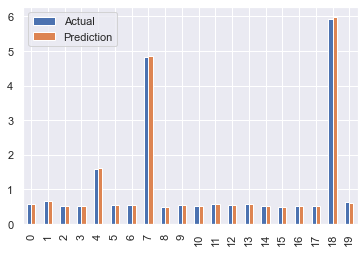

In [275]:
show_graph.plot(kind='bar')
plt.show()